# Chapter 2: Melody -- The Hook That Sticks

## Learning Objectives

By the end of this chapter you will be able to:

1. Understand **intervals** -- the distance between two notes -- and how they create emotional color
2. Build and use **scales** (major, minor, pentatonic) as raw material for melodies
3. Analyze **melodic contour** -- the shape of a melody over time
4. Distinguish **stepwise** (conjunct) from **leapwise** (disjunct) motion
5. Generate and listen to simple melodies using sine waves

---

## From Frequency to Pitch

Sound is vibration. A note's **pitch** is determined by its **frequency** in Hertz (Hz). The note A4 (middle A) vibrates at 440 Hz. Every octave doubles the frequency:

$$f_{\text{octave}} = 2 \times f_{\text{base}}$$

In equal temperament (the tuning system used in most Western music), the octave is divided into 12 equal semitones. Each semitone multiplies the frequency by:

$$r = 2^{1/12} \approx 1.05946$$

So the frequency of any note $n$ semitones above A4 is:

$$f(n) = 440 \times 2^{n/12}$$

In [1]:
import numpy as np

# The 12 note names in Western music (using sharps)
NOTE_NAMES: list[str] = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

def note_to_midi(name: str, octave: int = 4) -> int:
    """Convert note name + octave to MIDI number. C4 = 60, A4 = 69."""
    return NOTE_NAMES.index(name) + (octave + 1) * 12

def midi_to_freq(midi: int) -> float:
    """Convert MIDI number to frequency in Hz. A4 (69) = 440 Hz."""
    return 440.0 * 2 ** ((midi - 69) / 12)

def midi_to_name(midi: int) -> str:
    """Convert MIDI number to note name + octave."""
    return f"{NOTE_NAMES[midi % 12]}{midi // 12 - 1}"

# Print the chromatic scale from C4 to C5 with frequencies
print(f"{'Note':<6} {'MIDI':<6} {'Freq (Hz)':<12} {'Ratio to C4':<12}")
print("─" * 36)
c4_freq = midi_to_freq(note_to_midi("C", 4))
for semitone in range(13):  # 0 through 12 inclusive
    midi = note_to_midi("C", 4) + semitone
    freq = midi_to_freq(midi)
    name = midi_to_name(midi)
    print(f"{name:<6} {midi:<6} {freq:<12.2f} {freq / c4_freq:<12.4f}")

Note   MIDI   Freq (Hz)    Ratio to C4 
────────────────────────────────────
C4     60     261.63       1.0000      
C#4    61     277.18       1.0595      
D4     62     293.66       1.1225      
D#4    63     311.13       1.1892      
E4     64     329.63       1.2599      
F4     65     349.23       1.3348      
F#4    66     369.99       1.4142      
G4     67     392.00       1.4983      
G#4    68     415.30       1.5874      
A4     69     440.00       1.6818      
A#4    70     466.16       1.7818      
B4     71     493.88       1.8877      
C5     72     523.25       2.0000      


## Intervals

An **interval** is the distance between two pitches, measured in semitones.

```
Semitones  Name              Character
─────────────────────────────────────────
0          Unison            Identity
1          Minor 2nd         Tense, dissonant
2          Major 2nd         Stepping, neutral
3          Minor 3rd         Sad, gentle
4          Major 3rd         Happy, bright
5          Perfect 4th       Open, hymn-like
7          Perfect 5th       Strong, stable
12         Octave            Same note, higher
```

Intervals are the **atoms of melody**. A melody is just a sequence of intervals.

In [2]:
# Define interval names for analysis
INTERVAL_NAMES: dict[int, str] = {
    0: "Unison", 1: "m2", 2: "M2", 3: "m3", 4: "M3",
    5: "P4", 6: "Tritone", 7: "P5", 8: "m6", 9: "M6",
    10: "m7", 11: "M7", 12: "Octave",
}

def intervals_from_notes(midi_notes: list[int]) -> list[int]:
    """Compute the interval (in semitones) between consecutive notes."""
    return [b - a for a, b in zip(midi_notes, midi_notes[1:])]

def describe_intervals(midi_notes: list[int]) -> None:
    """Print each interval with its name and direction."""
    for i, (a, b) in enumerate(zip(midi_notes, midi_notes[1:])):
        diff = b - a
        direction = "↑" if diff > 0 else "↓" if diff < 0 else "→"
        name = INTERVAL_NAMES.get(abs(diff), f"{abs(diff)} semitones")
        print(f"  {midi_to_name(a)} {direction} {midi_to_name(b)}  =  {name} ({diff:+d} semitones)")

# Example: the opening notes of "Twinkle Twinkle Little Star" (C C G G A A G)
twinkle = [60, 60, 67, 67, 69, 69, 67]
print("Melody:", " ".join(midi_to_name(n) for n in twinkle))
print()
describe_intervals(twinkle)

Melody: C4 C4 G4 G4 A4 A4 G4

  C4 → C4  =  Unison (+0 semitones)
  C4 ↑ G4  =  P5 (+7 semitones)
  G4 → G4  =  Unison (+0 semitones)
  G4 ↑ A4  =  M2 (+2 semitones)
  A4 → A4  =  Unison (+0 semitones)
  A4 ↓ G4  =  M2 (-2 semitones)


## Scales: The Note Palette

A **scale** is a set of notes chosen from the 12 available. Scales give melodies their flavor.

We define scales by their **interval pattern** -- the gaps (in semitones) between consecutive notes:

$$\text{Major scale: } W\text{-}W\text{-}H\text{-}W\text{-}W\text{-}W\text{-}H \quad (2\text{-}2\text{-}1\text{-}2\text{-}2\text{-}2\text{-}1)$$
$$\text{Minor scale: } W\text{-}H\text{-}W\text{-}W\text{-}H\text{-}W\text{-}W \quad (2\text{-}1\text{-}2\text{-}2\text{-}1\text{-}2\text{-}2)$$

where $W$ = whole step (2 semitones) and $H$ = half step (1 semitone).

In [3]:
# Scale definitions as interval patterns (semitones between consecutive degrees)
SCALES: dict[str, list[int]] = {
    "Major":             [2, 2, 1, 2, 2, 2, 1],
    "Natural Minor":     [2, 1, 2, 2, 1, 2, 2],
    "Major Pentatonic":  [2, 2, 3, 2, 3],
    "Minor Pentatonic":  [3, 2, 2, 3, 2],
    "Blues":             [3, 2, 1, 1, 3, 2],
}

def build_scale(root_midi: int, pattern: list[int], octaves: int = 1) -> list[int]:
    """Build a scale from a root note and interval pattern.
    
    Args:
        root_midi: MIDI number of the root note
        pattern: list of semitone intervals between consecutive scale degrees
        octaves: how many octaves to span
    """
    notes = [root_midi]
    for _ in range(octaves):
        for interval in pattern:
            notes.append(notes[-1] + interval)
    return notes

# Print all scales starting from C4
root = note_to_midi("C", 4)
for scale_name, pattern in SCALES.items():
    notes = build_scale(root, pattern)
    names = [midi_to_name(n) for n in notes]
    print(f"{scale_name:<20} {' - '.join(names)}")

Major                C4 - D4 - E4 - F4 - G4 - A4 - B4 - C5
Natural Minor        C4 - D4 - D#4 - F4 - G4 - G#4 - A#4 - C5
Major Pentatonic     C4 - D4 - E4 - G4 - A4 - C5
Minor Pentatonic     C4 - D#4 - F4 - G4 - A#4 - C5
Blues                C4 - D#4 - F4 - F#4 - G4 - A#4 - C5


## Melodic Contour

The **contour** of a melody is its shape -- the pattern of ups and downs over time. Even without knowing exact pitches, contour tells you a lot:

- **Ascending** lines build energy and tension
- **Descending** lines release tension and resolve
- **Arch** shapes (rise then fall) are the most common in vocal melodies
- **Flat** contours feel static or chant-like

Let's visualize contours as pitch-over-time plots.

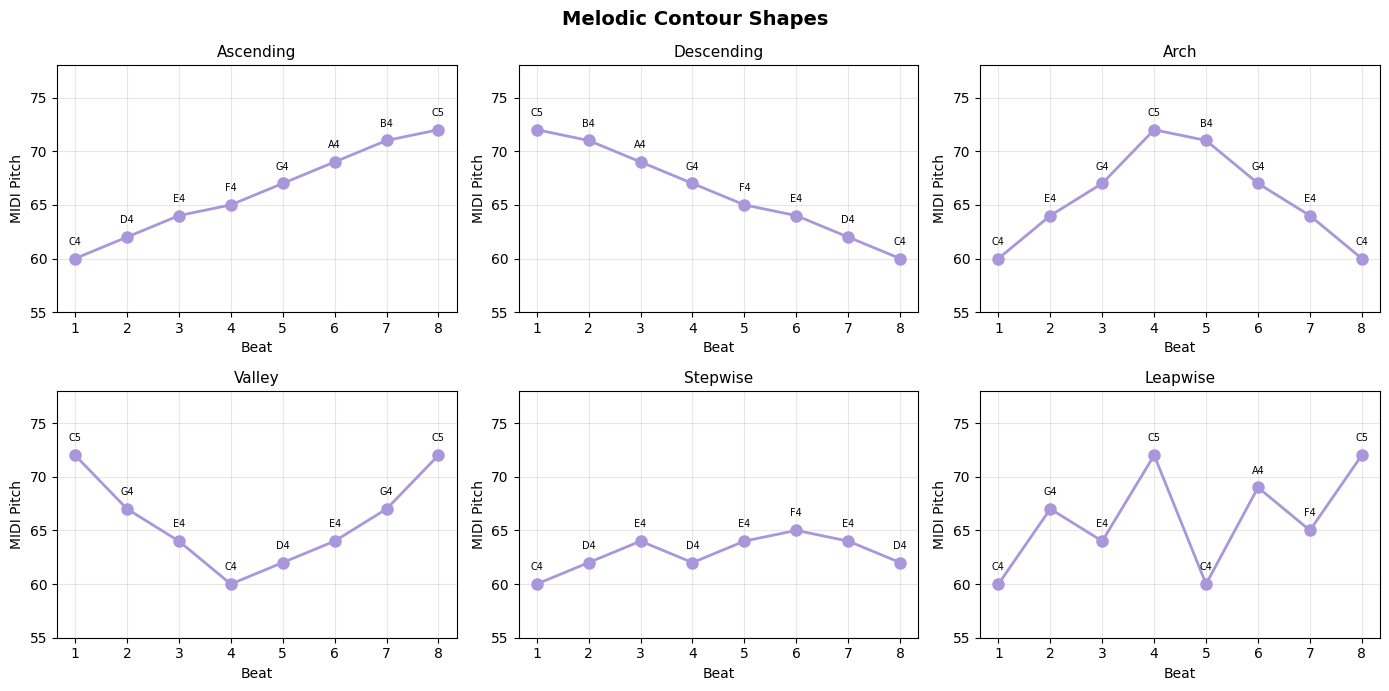

In [4]:
import matplotlib.pyplot as plt

# Define several 8-note melodies with distinct contours
melodies: dict[str, list[int]] = {
    "Ascending":   [60, 62, 64, 65, 67, 69, 71, 72],       # C major scale up
    "Descending":  [72, 71, 69, 67, 65, 64, 62, 60],       # C major scale down
    "Arch":        [60, 64, 67, 72, 71, 67, 64, 60],       # up then down
    "Valley":      [72, 67, 64, 60, 62, 64, 67, 72],       # down then up
    "Stepwise":    [60, 62, 64, 62, 64, 65, 64, 62],       # small steps
    "Leapwise":    [60, 67, 64, 72, 60, 69, 65, 72],       # big jumps
}

fig, axes = plt.subplots(2, 3, figsize=(14, 7))
fig.suptitle("Melodic Contour Shapes", fontsize=14, fontweight="bold")

for ax, (name, notes) in zip(axes.flat, melodies.items()):
    beats = list(range(1, len(notes) + 1))
    ax.plot(beats, notes, "o-", color="#AA96DA", linewidth=2, markersize=8)
    # Label each note
    for beat, note in zip(beats, notes):
        ax.annotate(midi_to_name(note), (beat, note), textcoords="offset points",
                    xytext=(0, 10), ha="center", fontsize=7)
    ax.set_title(name, fontsize=11)
    ax.set_xlabel("Beat")
    ax.set_ylabel("MIDI Pitch")
    ax.set_ylim(55, 78)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Stepwise vs. Leapwise Motion

- **Stepwise (conjunct)**: moving by 1 or 2 semitones. Smooth, singable, predictable.
- **Leapwise (disjunct)**: jumping 3+ semitones. Dramatic, attention-grabbing, harder to sing.

Most singable melodies are **mostly stepwise** with a few well-placed leaps for emphasis. The leap usually occurs at the emotional peak of the phrase.

Let's quantify this.

In [5]:
def analyze_motion(midi_notes: list[int]) -> dict[str, float]:
    """Classify intervals as stepwise (<=2 semitones) or leapwise (>2)."""
    ivls = [abs(b - a) for a, b in zip(midi_notes, midi_notes[1:])]
    n = len(ivls)
    steps = sum(1 for i in ivls if i <= 2)
    leaps = sum(1 for i in ivls if i > 2)
    return {
        "total_intervals": n,
        "steps": steps,
        "leaps": leaps,
        "step_pct": steps / n * 100 if n > 0 else 0,
        "avg_interval": np.mean(ivls),
        "max_interval": max(ivls),
    }

print(f"{'Melody':<14} {'Steps':<8} {'Leaps':<8} {'Step%':<8} {'Avg Int':<10} {'Max Int':<8}")
print("─" * 56)
for name, notes in melodies.items():
    stats = analyze_motion(notes)
    print(f"{name:<14} {stats['steps']:<8} {stats['leaps']:<8} {stats['step_pct']:<8.0f} "
          f"{stats['avg_interval']:<10.1f} {stats['max_interval']:<8}")

Melody         Steps    Leaps    Step%    Avg Int    Max Int 
────────────────────────────────────────────────────────
Ascending      7        0        100      1.7        2       
Descending     7        0        100      1.7        2       
Arch           1        6        14       3.4        5       
Valley         2        5        29       3.4        5       
Stepwise       7        0        100      1.7        2       
Leapwise       0        7        0        7.1        12      


## Generating Melodies from Scales

We can generate melodies algorithmically by choosing notes from a scale. This is not about replacing human creativity -- it is about **exploring possibilities** that you can then refine.

Strategy: weighted random walk on scale degrees, biased toward stepwise motion.

In [9]:
def generate_melody(
    scale_notes: list[int],
    length: int = 8,
    step_bias: float = 0.7,
    seed: int = 42,
) -> list[int]:
    """Generate a melody by walking through scale degrees.
    
    Args:
        scale_notes: available pitches (MIDI), sorted
        length: number of notes to generate
        step_bias: probability of moving by one scale degree (vs. larger leap)
        seed: random seed for reproducibility
    """
    rng = np.random.default_rng(seed)
    # Start on the root (first note)
    idx = 0
    melody = [scale_notes[idx]]
    
    for _ in range(length - 1):
        if rng.random() < step_bias:
            # Stepwise: move +/- 1 scale degree
            step = rng.choice([-1, 1])
        else:
            # Leap: move +/- 2 or 3 scale degrees
            step = rng.choice([-3, -2, 2, 3])
        
        idx = max(0, min(len(scale_notes) - 1, idx + step))
        melody.append(scale_notes[idx])
    
    return melody

# Generate melodies from different scales
root = note_to_midi("C", 4)
for scale_name in ["Major", "Minor Pentatonic", "Blues"]:
    scale = build_scale(root, SCALES[scale_name], octaves=2)
    melody = generate_melody(scale, length=8, step_bias=0.65, seed=13)
    names = [midi_to_name(n) for n in melody]
    print(f"{scale_name + ' melody:':<25} {' '.join(names)}")

Major melody:             C4 F4 B4 A4 E4 F4 C4 F4
Minor Pentatonic melody:  C4 G4 D#5 C5 F4 G4 C4 G4
Blues melody:             C4 F#4 C5 A#4 F4 F#4 C4 F#4


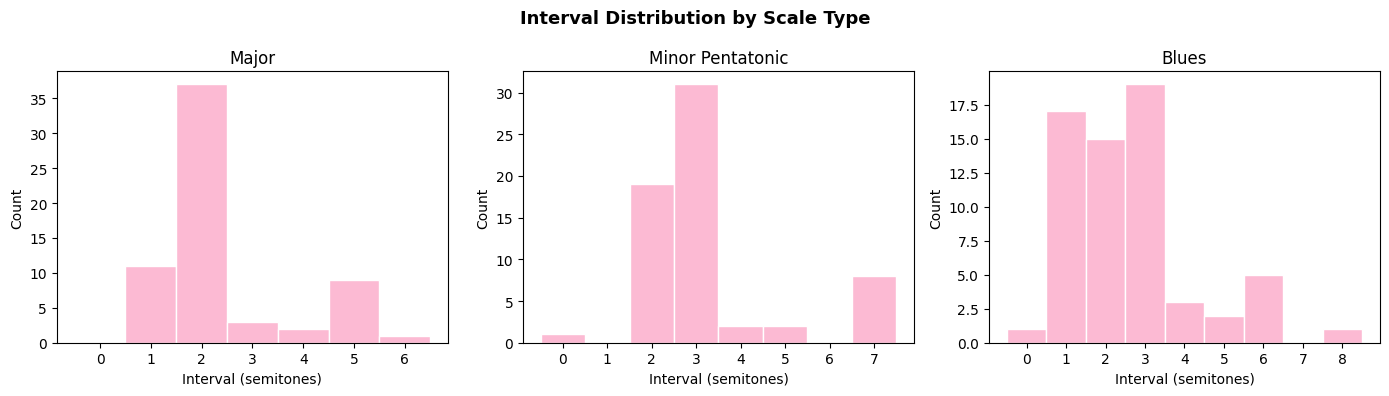

In [10]:
# Interval histogram: what intervals appear in our generated melodies?

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle("Interval Distribution by Scale Type", fontsize=13, fontweight="bold")

for ax, scale_name in zip(axes, ["Major", "Minor Pentatonic", "Blues"]):
    scale = build_scale(root, SCALES[scale_name], octaves=2)
    # Generate a longer melody for statistical significance
    melody = generate_melody(scale, length=64, step_bias=0.65, seed=7)
    ivls = [abs(b - a) for a, b in zip(melody, melody[1:])]
    
    bins = range(0, max(ivls) + 2)
    ax.hist(ivls, bins=bins, color="#FCBAD3", edgecolor="white", align="left")
    ax.set_title(scale_name)
    ax.set_xlabel("Interval (semitones)")
    ax.set_ylabel("Count")
    ax.set_xticks(range(0, max(ivls) + 1))

plt.tight_layout()
plt.show()

## Hearing Melodies: Sine Wave Synthesis

A pure tone at frequency $f$ is a sine wave:

$$y(t) = A \sin(2\pi f t)$$

We can chain these together to hear our melodies. This is extremely basic synthesis -- real instruments have complex overtone structures -- but it lets us **listen** to what we are computing.

In [11]:
from IPython.display import Audio

def melody_to_audio(
    midi_notes: list[int],
    note_duration: float = 0.4,   # seconds per note
    sample_rate: int = 22050,
) -> np.ndarray:
    """Convert a list of MIDI notes to a sine-wave audio signal.
    
    Each note gets a simple amplitude envelope (attack-sustain-release)
    to avoid harsh clicks.
    """
    samples_per_note = int(sample_rate * note_duration)
    audio = np.zeros(samples_per_note * len(midi_notes))
    
    for i, midi in enumerate(midi_notes):
        freq = midi_to_freq(midi)
        t = np.linspace(0, note_duration, samples_per_note, endpoint=False)
        # Pure sine wave
        wave = np.sin(2 * np.pi * freq * t)
        # Simple envelope: fade in/out over 10% of duration to avoid clicks
        fade = int(samples_per_note * 0.1)
        envelope = np.ones(samples_per_note)
        envelope[:fade] = np.linspace(0, 1, fade)
        envelope[-fade:] = np.linspace(1, 0, fade)
        wave *= envelope * 0.5  # amplitude scaling
        
        start = i * samples_per_note
        audio[start:start + samples_per_note] = wave
    
    return audio

# Generate and play a C major scale
c_major = build_scale(note_to_midi("C", 4), SCALES["Major"])
audio = melody_to_audio(c_major)
print("C Major scale (listen below):")
print(" ".join(midi_to_name(n) for n in c_major))
Audio(audio, rate=22050)

C Major scale (listen below):
C4 D4 E4 F4 G4 A4 B4 C5


In [12]:
# Play one of our generated melodies
scale = build_scale(note_to_midi("C", 4), SCALES["Major Pentatonic"], octaves=2)
melody = generate_melody(scale, length=16, step_bias=0.6, seed=99)
audio = melody_to_audio(melody, note_duration=0.3)

print("Generated pentatonic melody:")
print(" ".join(midi_to_name(n) for n in melody))
Audio(audio, rate=22050)

Generated pentatonic melody:
C4 D4 E4 C5 D5 E5 G5 D5 E5 D5 C5 D5 E5 C6 A5 D5


## Exercises

1. **Build a scale**: Use `build_scale` to construct D minor (root = D4, natural minor pattern). Print the notes.
2. **Contour analysis**: Create an 8-note melody and plot its contour. Is it an arch, ascending, or something else?
3. **Step bias experiment**: Generate two melodies with `step_bias=0.9` and `step_bias=0.3`. Plot both contours. Which is smoother?
4. **Listen and compare**: Generate melodies from the major scale and the blues scale. What emotional difference do you hear?

---

## What's Next

A melody is a single voice. In **Chapter 3: Harmony and Chord Progressions**, we will stack notes to build chords and explore the harmonic framework that supports melody.